In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df_mv=pd.read_csv('data/market_value.csv')
industries_class=pd.read_csv('data/industries_class.csv')
industries_code=pd.read_csv('data/industries_code.csv')

# 9类

In [3]:
df_with_label=pd.read_csv('data/df_with_label.csv')

In [4]:
df_with_label['label_time']=pd.to_datetime((df_with_label['label_time']).apply(str))

In [5]:
df_with_label.head()

,Unnamed: 0,trade_dt_x,wind_code,ep_ttm,bp_lyr,sp_ttm,cfp_ncf_ttm,cfp_ocf_ttm,cfp_fcff_ttm,ortoev_ttm,...,beta_60D_szzz,beta_120D_szzz,beta_240D_szzz,beta_480D_szzz,updatetime,trade_dt_y,s_mq_pctchange,s_mq_amount,label,label_time
0,0,2015-01-30,000001.SZ,0.120824,0.796337,0.436667,0.090356,-0.089589,NaN,0.397811,...,1.357957,1.313219,1.339941,1.574382,2019-05-23 01:48:00.000,2015-02-27,0.4304,1.804355e+06,2,2015-01-30
1,1,2015-01-30,000002.SZ,0.106428,0.542133,0.932968,0.081991,0.215316,0.043625,0.878831,...,1.330106,1.297934,1.226921,1.308739,2019-05-23 01:48:00.000,2015-02-27,-2.8202,3.287976e+06,0,2015-01-30
2,2,2015-01-30,000004.SZ,-0.005140,0.048630,0.046602,-0.010674,0.001702,-0.007284,0.047010,...,0.367000,0.331869,0.453777,0.558445,2019-05-23 01:48:00.000,2015-02-27,7.8996,4.136355e+04,6,2015-01-30
3,3,2015-01-30,000005.SZ,-0.012082,0.158174,0.014907,0.000598,-0.030551,0.086292,0.015112,...,0.311863,0.295469,0.554438,0.811105,2019-05-23 01:48:00.000,2015-02-27,0.0000,0.000000e+00,1,2015-01-30
4,4,2015-01-30,000006.SZ,0.065695,0.446514,0.415537,-0.023423,-0.107033,0.079987,0.376103,...,0.743068,0.790482,0.879827,1.056388,2019-05-23 01:48:00.000,2015-02-27,1.0795,1.422369e+05,2,2015-01-30


In [6]:
portfolio_9=pd.read_csv('xgboost/data/industries/portfolio_9.csv')

In [7]:
portfolio_9["CITICS_IND_CODE"].unique()

array(['b10n010100', 'b10i010200', 'b10n020100', 'b10t010100',
       'b107010100', 'b107020100', 'b10p030100', 'b10p020100',
       'b108010100', 'b10q020300', 'b104010100', 'b10s010500',
       'b10k020100', 'b10k010300', 'b10n010200', 'b10s010200',
       'b101020400', 'b10g010100', 'b10b020200', 'b10i030100',
       'b10i040100', 'b106020400', 'b106010100', 'b108030200',
       'b10t010200', 'b10i020200', 'b10j010100', 'b10d010100',
       'b10b020100', 'b104020300', 'b10h040200', 'b10m020100',
       'b103020300', 'b106030200', 'b105020200', 'b10k030100',
       'b10p010100', 'b10m010100', 'b104020400', 'b10c010100',
       'b10d030100', 'b106030100', 'b10e010100', 'b10c010200',
       'b10i010100', 'b10j020100', 'b10a030500', 'b106010200',
       'b103020500', 'b109010100', 'b101020500', 'b104020100',
       'b10j020400', 'b106040600', 'b103020100', 'b10o010100',
       'b10a060100', 'b105020300', 'b10d050100', 'b10a010100',
       'b10a040100', 'b10r030200', 'b103020400', 'b1030

In [43]:
industries_code['new_column']=industries_code["INDUSTRIESCODE"].apply(lambda x: x[:4])

In [44]:
portfolio_9['new_column']=portfolio_9["CITICS_IND_CODE"].apply(lambda x: x[:4])

In [45]:
x=pd.merge(portfolio_9,industries_code, how='inner', left_on=['new_column'], right_on=["new_column"]).groupby("INDUSTRIESNAME").count()

In [57]:
x.sort_values("INDUSTRIESCODE")

,Unnamed: 0,trade_dt_x,wind_code,CITICS_IND_CODE,new_column,INDUSTRIESCODE
INDUSTRIESNAME,,,,,,
银行,5,5,5,5,5,5
煤炭,11,11,11,11,11,11
餐饮旅游,16,16,16,16,16,16
非银行金融,27,27,27,27,27,27
石油石化,28,28,28,28,28,28
钢铁,33,33,33,33,33,33
国防军工,40,40,40,40,40,40
综合,41,41,41,41,41,41
交通运输,52,52,52,52,52,52


In [51]:
x.to_csv("data/industries_9.csv")

In [27]:
portfolio_9=portfolio_9[['trade_dt_x','wind_code']]

In [28]:
portfolio_9['trade_dt_x']=pd.to_datetime((portfolio_9['trade_dt_x']).apply(str))

C:\Users\surface\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_9= pd.merge(portfolio_9, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])

In [30]:
df_9['s_mq_pctchange']/=100

In [31]:
df_9['s_mq_pctchange']+=1

In [32]:
df_9

,trade_dt_x_x,wind_code,Unnamed: 0,trade_dt_x_y,ep_ttm,bp_lyr,sp_ttm,cfp_ncf_ttm,cfp_ocf_ttm,cfp_fcff_ttm,...,beta_60D_szzz,beta_120D_szzz,beta_240D_szzz,beta_480D_szzz,updatetime,trade_dt_y,s_mq_pctchange,s_mq_amount,label,label_time
0,2019-01-31,000002.SZ,149113,2019-01-31,0.101018,0.457018,0.985252,0.119374,0.130201,0.145199,...,1.201361,1.402231,1.390908,1.365583,2019-05-23 04:08:00.000,2019-02-28,1.008649,2.847530e+06,0,2019-01-31
1,2019-02-28,000002.SZ,152692,2019-02-28,0.100151,0.453100,0.976804,0.118351,0.129085,0.143954,...,1.020606,1.262623,1.324438,1.312393,2019-05-23 04:10:00.000,2019-03-29,1.097534,4.560608e+06,5,2019-02-28
2,2019-04-30,000002.SZ,159870,2019-04-30,0.104160,0.482686,0.965756,0.146829,0.106184,0.253168,...,1.060787,1.067757,1.299824,1.309113,2019-05-23 04:16:00.000,2019-05-31,0.924517,1.788778e+06,4,2019-04-30
3,2019-06-28,000002.SZ,167077,2019-06-28,0.108167,0.501257,1.002913,0.152479,0.110270,0.262908,...,1.241199,1.137029,1.280581,1.270195,2019-10-17 17:25:16.207,2019-07-31,1.034159,2.819577e+06,7,2019-06-28
4,2019-07-31,000002.SZ,170694,2019-07-31,0.104594,0.484700,0.969785,0.147442,0.106628,0.254224,...,0.893802,1.080794,1.223913,1.264927,2019-10-17 17:38:17.183,2019-08-30,0.933197,2.336927e+06,2,2019-07-31
5,2019-09-30,000002.SZ,178017,2019-09-30,0.124658,0.550061,1.130837,-0.058145,0.159625,0.228579,...,0.844463,1.021157,1.101918,1.273339,2019-10-17 17:54:17.497,2019-10-31,1.024324,3.132373e+06,7,2019-09-30
6,2019-10-31,000002.SZ,181696,2019-10-31,0.126828,0.557866,1.152499,-0.090228,0.203717,0.189593,...,0.989616,0.909220,1.060799,1.274362,2019-11-02 03:49:22.333,2019-11-29,1.044101,3.212555e+06,8,2019-10-31
7,2019-05-31,000004.SZ,163467,2019-05-31,NaN,NaN,NaN,NaN,NaN,NaN,...,1.210819,0.907521,0.692187,0.603059,2019-10-17 17:16:49.123,2019-06-28,0.987066,4.777881e+04,3,2019-05-31
8,2019-06-28,000004.SZ,167078,2019-06-28,-0.009529,0.064302,0.223469,-0.025677,-0.032670,-0.036007,...,1.563903,0.982347,0.684531,0.616998,2019-10-17 17:25:16.220,2019-07-31,0.871753,3.681929e+04,0,2019-06-28
9,2019-07-31,000004.SZ,170695,2019-07-31,-0.010930,0.073757,0.256325,-0.029452,-0.037474,-0.041302,...,1.582823,1.027800,0.771511,0.620774,2019-10-17 17:38:17.203,2019-08-30,1.072493,3.185178e+04,8,2019-07-31


In [33]:
yield_array_9=df_9.groupby('label_time').mean()['s_mq_pctchange']

In [34]:
np.std(yield_array_9)

0.07461925888723857

C:\Users\surface\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


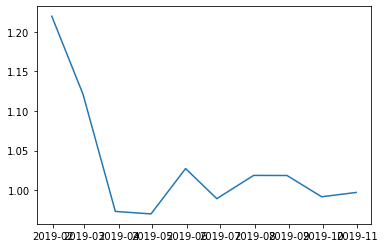

In [35]:
plt.plot(yield_array_9)

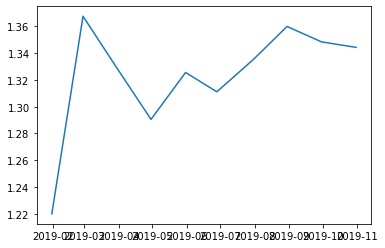

In [36]:
plt.plot(yield_array_9.cumprod())

# 8类

In [37]:
portfolio_8=pd.read_csv('xgboost/data/industries/portfolio_8.csv')
portfolio_8=portfolio_8[['trade_dt_x','wind_code']]
portfolio_8['trade_dt_x']=pd.to_datetime((portfolio_8['trade_dt_x']).apply(str))
df_8= pd.merge(portfolio_8, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_8['s_mq_pctchange']/=100
df_8['s_mq_pctchange']+=1
yield_array_8=df_8.groupby('label_time').mean()['s_mq_pctchange']

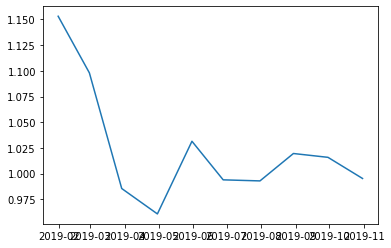

In [38]:
plt.plot(yield_array_8)

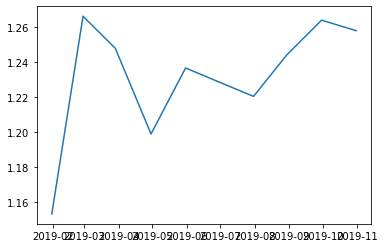

In [39]:
plt.plot(yield_array_8.cumprod())

In [40]:
np.std(yield_array_8)

0.055178161420518505

# 7类

In [41]:
portfolio_7=pd.read_csv('xgboost/data/industries/portfolio_7.csv')
portfolio_7=portfolio_7[['trade_dt_x','wind_code']]
portfolio_7['trade_dt_x']=pd.to_datetime((portfolio_7['trade_dt_x']).apply(str))
df_7= pd.merge(portfolio_7, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_7['s_mq_pctchange']/=100
df_7['s_mq_pctchange']+=1
yield_array_7=df_7.groupby('label_time').mean()['s_mq_pctchange']

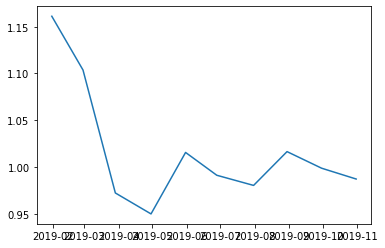

In [42]:
plt.plot(yield_array_7)

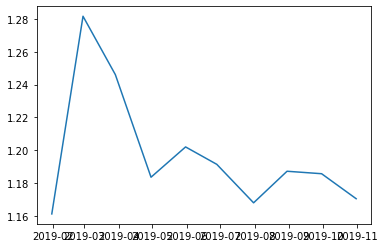

In [43]:
plt.plot(yield_array_7.cumprod())

In [44]:
np.std(yield_array_7)

0.061685064141393374

# 6类

In [45]:
portfolio_6=pd.read_csv('xgboost/data/industries/portfolio_6.csv')
portfolio_6=portfolio_6[['trade_dt_x','wind_code']]
portfolio_6['trade_dt_x']=pd.to_datetime((portfolio_6['trade_dt_x']).apply(str))
df_6= pd.merge(portfolio_6, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_6['s_mq_pctchange']/=100
df_6['s_mq_pctchange']+=1
yield_array_6=df_6.groupby('label_time').mean()['s_mq_pctchange']

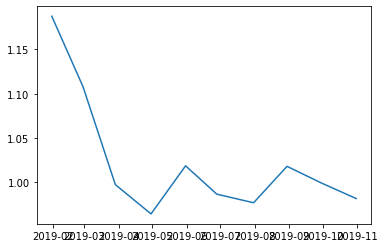

In [46]:
plt.plot(yield_array_6)

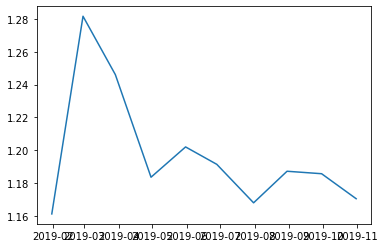

In [47]:
plt.plot(yield_array_7.cumprod())

In [48]:
np.std(yield_array_6)

0.06628527132840673

# 5类

In [49]:
portfolio_5=pd.read_csv('xgboost/data/industries/portfolio_5.csv')
portfolio_5=portfolio_5[['trade_dt_x','wind_code']]
portfolio_5['trade_dt_x']=pd.to_datetime((portfolio_5['trade_dt_x']).apply(str))
df_5= pd.merge(portfolio_5, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_5['s_mq_pctchange']/=100
df_5['s_mq_pctchange']+=1
yield_array_5=df_5.groupby('label_time').mean()['s_mq_pctchange']

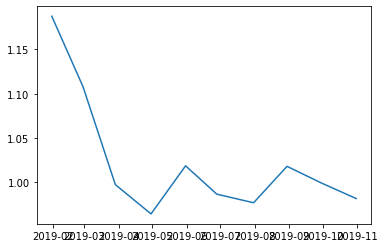

In [50]:
plt.plot(yield_array_6)

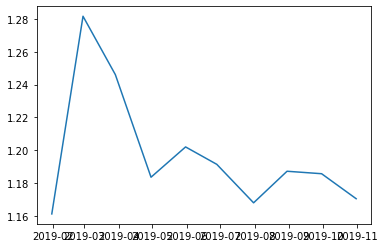

In [51]:
plt.plot(yield_array_7.cumprod())

In [52]:
np.std(yield_array_5)

0.07041655751846577

# 4类

In [54]:
portfolio_4=pd.read_csv('xgboost/data/industries/portfolio_4.csv')
portfolio_4=portfolio_4[['trade_dt_x','wind_code']]
portfolio_4['trade_dt_x']=pd.to_datetime((portfolio_4['trade_dt_x']).apply(str))
df_4= pd.merge(portfolio_4, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_4['s_mq_pctchange']/=100
df_4['s_mq_pctchange']+=1
yield_array_4=df_4.groupby('label_time').mean()['s_mq_pctchange']

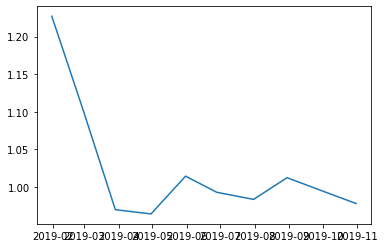

In [55]:
plt.plot(yield_array_4)

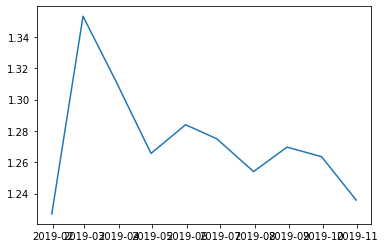

In [56]:
plt.plot(yield_array_4.cumprod())

# 3类

In [57]:
portfolio_3=pd.read_csv('xgboost/data/industries/portfolio_3.csv')
portfolio_3=portfolio_3[['trade_dt_x','wind_code']]
portfolio_3['trade_dt_x']=pd.to_datetime((portfolio_3['trade_dt_x']).apply(str))
df_3= pd.merge(portfolio_3, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_3['s_mq_pctchange']/=100
df_3['s_mq_pctchange']+=1
yield_array_3=df_3.groupby('label_time').mean()['s_mq_pctchange']

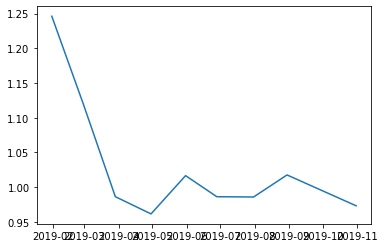

In [58]:
plt.plot(yield_array_3)

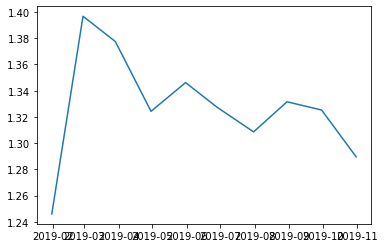

In [59]:
plt.plot(yield_array_3.cumprod())

# 2类

In [60]:
portfolio_2=pd.read_csv('xgboost/data/industries/portfolio_2.csv')
portfolio_2=portfolio_2[['trade_dt_x','wind_code']]
portfolio_2['trade_dt_x']=pd.to_datetime((portfolio_2['trade_dt_x']).apply(str))
df_2= pd.merge(portfolio_2, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_2['s_mq_pctchange']/=100
df_2['s_mq_pctchange']+=1
yield_array_2=df_2.groupby('label_time').mean()['s_mq_pctchange']

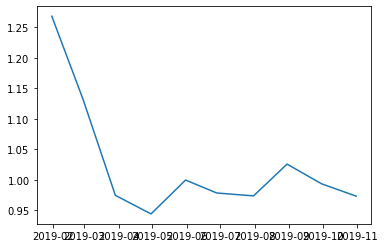

In [61]:
plt.plot(yield_array_2)

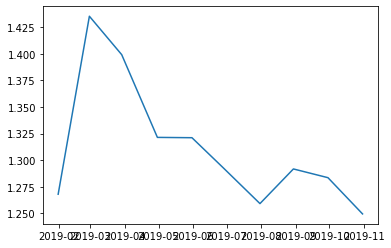

In [62]:
plt.plot(yield_array_2.cumprod())

# 1类

In [63]:
portfolio_1=pd.read_csv('xgboost/data/industries/portfolio_1.csv')
portfolio_1=portfolio_1[['trade_dt_x','wind_code']]
portfolio_1['trade_dt_x']=pd.to_datetime((portfolio_1['trade_dt_x']).apply(str))
df_1= pd.merge(portfolio_1, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_1['s_mq_pctchange']/=100
df_1['s_mq_pctchange']+=1
yield_array_1=df_1.groupby('label_time').mean()['s_mq_pctchange']

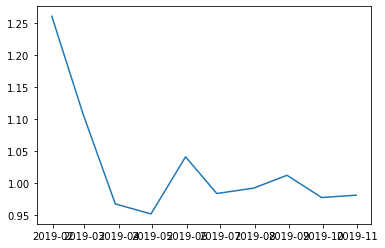

In [64]:
plt.plot(yield_array_1)

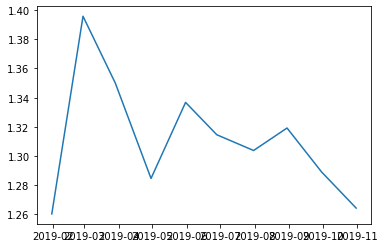

In [65]:
plt.plot(yield_array_1.cumprod())

# 0类

In [31]:
portfolio_0=pd.read_csv('xgboost/data/industries/portfolio_0.csv')

In [40]:
portfolio_0['new_column']=portfolio_0["CITICS_IND_CODE"].apply(lambda x: x[:4])

In [41]:
industries_code['new_column']=industries_code["INDUSTRIESCODE"].apply(lambda x: x[:4])

In [42]:
y=pd.merge(portfolio_0,industries_code, how='inner', left_on=['new_column'], right_on=["new_column"]).groupby("INDUSTRIESNAME").count()

In [47]:
y.sort_values("INDUSTRIESCODE")

,Unnamed: 0,trade_dt_x,wind_code,CITICS_IND_CODE,new_column,INDUSTRIESCODE
INDUSTRIESNAME,,,,,,
银行,17,17,17,17,17,17
煤炭,23,23,23,23,23,23
餐饮旅游,30,30,30,30,30,30
钢铁,52,52,52,52,52,52
石油石化,87,87,87,87,87,87
综合,107,107,107,107,107,107
纺织服装,117,117,117,117,117,117
家电,119,119,119,119,119,119
商贸零售,137,137,137,137,137,137


In [52]:
y.to_csv("data/industries_0.csv")

In [96]:
portfolio_0=portfolio_0[['trade_dt_x','wind_code']]
portfolio_0['trade_dt_x']=pd.to_datetime((portfolio_0['trade_dt_x']).apply(str))
df_0= pd.merge(portfolio_0, df_with_label, how='inner', left_on=['wind_code', 'trade_dt_x'],
                        right_on=['wind_code', 'label_time'])
df_0['s_mq_pctchange']/=100
df_0['s_mq_pctchange']+=1
yield_array_0=df_0.groupby('label_time').mean()['s_mq_pctchange']

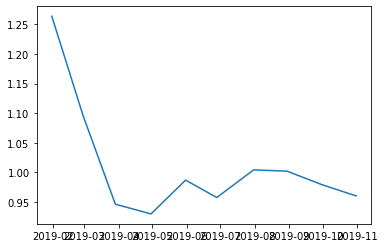

In [97]:
plt.plot(yield_array_0)

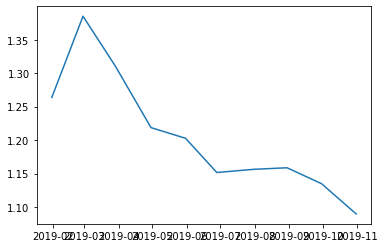

In [98]:
plt.plot(yield_array_0.cumprod())

In [99]:
np.std(yield_array_0)

0.0943526406875727

In [106]:
li=[np.array(yield_array_9),np.array(yield_array_9.cumprod()),np.array(yield_array_8),np.array(yield_array_8.cumprod()),np.array(yield_array_7),np.array(yield_array_7.cumprod()),np.array(yield_array_6),np.array(yield_array_6.cumprod()),np.array(yield_array_5),np.array(yield_array_5.cumprod()),np.array(yield_array_4),np.array(yield_array_4.cumprod()),np.array(yield_array_3),np.array(yield_array_3.cumprod()),np.array(yield_array_2),np.array(yield_array_2.cumprod()),np.array(yield_array_1),np.array(yield_array_1.cumprod()),np.array(yield_array_0),np.array(yield_array_0.cumprod())]

In [110]:
np.savetxt("presentation/industries.csv",li, delimiter=",")